In [8]:
import numpy as np 
import pandas as pd 

df = pd.read_csv(r'C:\Users\Arun JH\Desktop\vaibhavi-proj\Email_ML\spam.csv', sep =',', encoding = 'latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


DATA CLEANING

In [18]:
#Dropping the cols 
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace =True)

In [19]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
2502,ham,Ola would get back to you maybe not today but ...
730,spam,Email AlertFrom: Jeri StewartSize: 2KBSubject:...
415,ham,Whatsup there. Dont u want to sleep
4948,ham,I am in bus on the way to calicut
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(df.isnull().sum())     #to find missing values 
print(df.duplicated().sum()) # to find duplicates 

target    0
text      0
dtype: int64
403


In [23]:
#to remove duplicates 
df= df.drop_duplicates(keep = 'first')
print(df.duplicated().sum())
print(df.shape)

0
(5169, 2)


EDA

In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

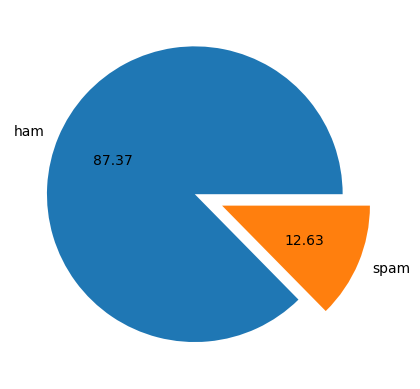

In [26]:
import matplotlib.pyplot as plt 

plt.pie(df['target'].value_counts(), labels = ['ham','spam'],explode =[0 , 0.2],autopct ="%0.2f")
plt.show()


In [27]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arun
[nltk_data]     JH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True